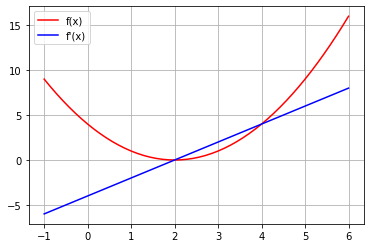

gradient : x_min =  1.999995150260194 f(x_min) =  1.999995150260194 nb_itération =  1.999995150260194


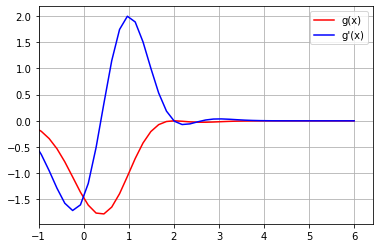

gradient : x_min =  0.38196414783101623 g(x_min) =  0.38196414783101623 nb_itération =  0.38196414783101623


In [4]:
from typing import Callable, Tuple, List
import numpy as np
from numpy import exp
from matplotlib import pyplot as plt


def f(x: float) -> float:
    """
    Retourne la valeur de f(x) pour un x donné
    """
    return (x - 2) ** 2


def df(x: float) -> float:
    """
    Retourne la valeur de f'(x) pour un x donné
    """
    return 2 * x - 4


def g(x: float) -> float:
    """
    Retourne la valeur de g(x) pour un x donné
    """
    return -exp(-(x - 1) ** 2) * (x - 2) ** 2


def dg(x: float) -> float:
    """
    Retourne la valeur de g'(x) pour un x donné
    """
    return 2 * (x - 2) * (x**2 - 3 * x + 1) * exp(-(x-1)**2)


def gradient(fonctionfx: Callable, dfonctionfx: Callable, x0: float =0, precision_requise:float = 10 ** -5, iteration_max: int = 1000,
             alpha: float = 0.01) -> Tuple[float, float, int]:
    """
    Retourne le min d'une fonction donné via l'algorithme du gradient
    fonctionfx: fonction f(x)
    dfonctionfx: f'(x)
    x0: the initial point of the function (x value)
    precision_requise: précision minimal pour stopper l'algorithme (ex: 10**-5)
    iteration_max: max number of iteration before stopping the algorithm. default = 1000
    alpha: pas après chaque itération (0.01 par défaut)
    retour: un tuple contenant la valeur min , le résultat f(x) et le nombre d'itération
    """
    dfx: float = dfonctionfx(x0)
    iteration: int = 0
    while abs(dfx) > precision_requise and iteration < iteration_max:
        dfx = dfonctionfx(x0)
        x0 = x0 - alpha * dfx
        iteration += 1
    return x0, fonctionfx(x0), iteration

"""-----------------------------question1 sans le tracé avec la descente de gradient------------------------------------"""
# Affichage de f(x) en rouge, f'(x) en bleu
x = np.linspace(start=-1, stop=6)
plt.plot(x, f(x), color="red")
plt.plot(x, df(x), color="blue")
plt.legend(["f(x)", "f'(x)"])
plt.grid()
plt.show()

# Gradient pour f(x)
gradient_fx = gradient(fonctionfx=f, dfonctionfx=df, x0=0, precision_requise=10 ** -5)
print("gradient : x_min = ",gradient_fx[0], "f(x_min) = ",gradient_fx[0], "nb_itération = ",gradient_fx[0])


# Affichages des graphes de g(x) (rouge) et de g'(x) (bleu)
x = np.linspace(start=-2.5, stop=6)
plt.plot(x, g(x), color="red")
plt.plot(x, dg(x), color="blue")
plt.xlim(-1, )
plt.legend(["g(x)", "g'(x)"])
plt.grid()
plt.show()
# Gradient pour g(x)
gradient_gx = gradient(fonctionfx=g, dfonctionfx=dg, x0=0, precision_requise=10 ** -5)
print("gradient : x_min = ",gradient_gx[0], "g(x_min) = ",gradient_gx[0], "nb_itération = ",gradient_gx[0])

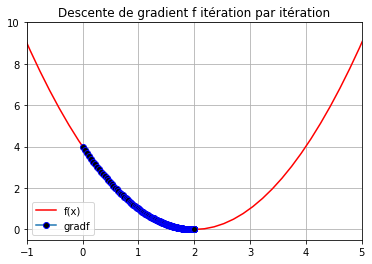

min x =  1.999995150260194 g(min x) =  2.3519976185587634e-11 nombre de changement de min x :  641


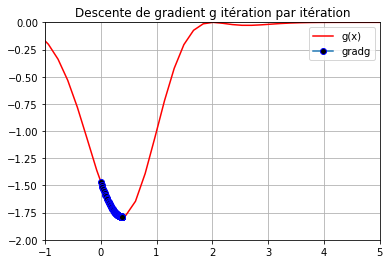

min x =  0.38196414783101623 g(min x) =  -1.7868559784056457 nombre de changement de min x :  246


In [5]:
"""-----------------------------question2 avec la descente de gradient------------------------------------"""
def gradient_avec_historique(fonctionfx: Callable, dfonctionfx: Callable, x0: float, precision_requise: float, iteration_max: int = 1000,
             alpha: float = 0.01) -> Tuple[float, float, List[Tuple[float, float]]]:

    dfx: float = dfonctionfx(x0)
    iteration: int = 0
    liste_xys: List[List[float]] = [[x0, fonctionfx(x0)]]# Liste pour stocker les valeurs de x et f(x) correspondantes à chaque itération
    while abs(dfx) > precision_requise and iteration < iteration_max:
        dfx = dfonctionfx(x0)
        x0 = x0 - (alpha * dfx)
        iteration += 1
        liste_xys.append([x0, fonctionfx(x0)])


    return x0, fonctionfx(x0), liste_xys

# Gradient pour f(x)
min_x0, min_fx0, historique_x0_f_x0s = gradient_avec_historique(fonctionfx=f, dfonctionfx=df, x0=0, precision_requise=10 ** -5)
plt.plot(x, f(x), color="red")
plt.xlim(-1, 5)
plt.ylim(-0.5, 10)
for pointXY in historique_x0_f_x0s:
    plt.plot(pointXY[0], pointXY[1], marker="o", markeredgecolor="blue", markerfacecolor="black", scalex="auto")
plt.grid()
plt.title("Descente de gradient f itération par itération")
plt.legend(["f(x)", "gradf"])
plt.show()
print("min x = ",min_x0, "g(min x) = ",min_fx0, "nombre de changement de min x : ", len(historique_x0_f_x0s)) 

# Gradient pour g(x)
min_x5, min_fx5, historique_x5_f_x5s = gradient_avec_historique(fonctionfx=g, dfonctionfx=dg, x0=0, precision_requise=10 ** -5)
plt.plot(x, g(x), color="red")
plt.xlim(-1, 5)
plt.ylim(-2, 0)
for pointXY in historique_x5_f_x5s:
    plt.plot(pointXY[0], pointXY[1], marker="o", markeredgecolor="blue", markerfacecolor="black")
plt.grid()
plt.title("Descente de gradient g itération par itération")
plt.legend(["g(x)", "gradg"])
plt.show()

print("min x = ",min_x5, "g(min x) = ",min_fx5, "nombre de changement de min x : ", len(historique_x5_f_x5s)) 
#print(historique_x_f_xs)


**Question 3**
Selon le choix de x0, le nombre d'itération pour atteindre le minimum global sera plus grand (on s'éloigne du minimum) ou ou plus petit (on se rapproche du minimum). Cependant, si on atteint un minimum local, on ne pourra pas en sortir pour atteindre un minimium global

**Question 4**
Pour différente valeurs de alpha, le nombre d'itération ne sera pas le même. De plus, pour un alpha trop grand ou trop petit, on atteint pas forcément le minimum global.

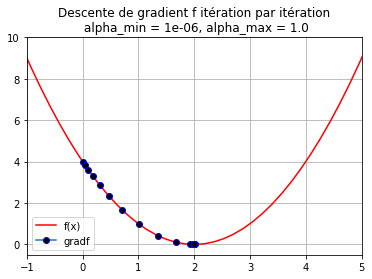

min x =  2.000000836804155 f(min x) =  7.002411935873992e-13 nombre de changement de min x :  18


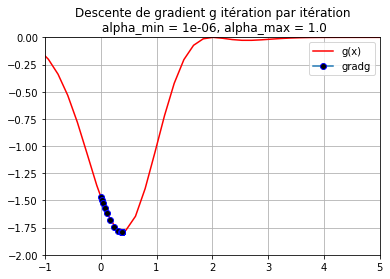

min x =  0.3819662186696466 g(min x) =  -1.7868559784141136 nombre de changement de min x :  16


In [6]:
alpha_min = 10**-6
alpha_max = 1.0
"""------------------------------------question5--------------------------------------------"""
def gradient_historique_alpha_variable(fonctionfx: Callable, dfonctionfx: Callable, x0: float, precision_requise: float, iteration_max: int = 1000,
             alpha: float = 0.01, alpha_min: float = alpha_min, alpha_max: float = alpha_max) -> Tuple[float, float, List[Tuple[float, float]]]:

    dfx: float = dfonctionfx(x0)
    iteration: int = 0
    liste_xys: List[List[float]] = [[x0, fonctionfx(x0)]]# Liste pour stocker les valeurs de x et f(x) correspondantes à chaque itération

    while abs(dfx) > precision_requise and iteration < iteration_max:
        dfx = dfonctionfx(x0)
        x1 = x0 - (alpha * dfx)
        
        # Vérifiez le signe de dfx(xn) et dfx(xn+1)
        signe_dfx_xn = 1 if dfx > 0 else -1 if dfx < 0 else 0
        signe_dfx_xn1 = 1 if dfonctionfx(x1) > 0 else -1 if dfonctionfx(x1) < 0 else 0
        
        if signe_dfx_xn == signe_dfx_xn1:
            # Les signes sont les mêmes, augmentez alpha
            alpha *= 1.5
        else:
            # Les signes sont différents, diminuez alpha
            alpha *= 0.5
        
        # Limitez alpha entre alpha_min et alpha_max
        alpha = max(alpha_min, min(alpha_max, alpha))

        x0 = x1
        iteration += 1
        liste_xys.append([x0, fonctionfx(x0)])

    return x0, fonctionfx(x0), liste_xys


# Gradient pour f(x)
min_x0, min_fx0, historique_x0_f_x0s = gradient_historique_alpha_variable(fonctionfx=f, dfonctionfx=df, x0=0, precision_requise=10 ** -5)
plt.plot(x, f(x), color="red")
plt.xlim(-1, 5)
plt.ylim(-0.5, 10)
for pointXY in historique_x0_f_x0s:
    plt.plot(pointXY[0], pointXY[1], marker="o", markeredgecolor="blue", markerfacecolor="black", scalex="auto")
plt.grid()
plt.title("Descente de gradient f itération par itération\n alpha_min = "+str(alpha_min)+", alpha_max = "+str(alpha_max))
plt.legend(["f(x)", "gradf"])
plt.show()
print("min x = ",min_x0,"f(min x) = ", min_fx0, "nombre de changement de min x : ", len(historique_x0_f_x0s)) 

# Gradient pour g(x)
min_x5, min_fx5, historique_x5_f_x5s = gradient_historique_alpha_variable(fonctionfx=g, dfonctionfx=dg, x0=0, precision_requise=10 ** -5)
plt.plot(x, g(x), color="red")
plt.xlim(-1, 5)
plt.ylim(-2, 0)
for pointXY in historique_x5_f_x5s:
    plt.plot(pointXY[0], pointXY[1], marker="o", markeredgecolor="blue", markerfacecolor="black")
plt.grid()
plt.title("Descente de gradient g itération par itération\n alpha_min = "+str(alpha_min)+", alpha_max = "+str(alpha_max))
plt.legend(["g(x)", "gradg"])
plt.show()

print("min x = ",min_x5, "g(min x) = ",min_fx5, "nombre de changement de min x : ", len(historique_x5_f_x5s)) 
#print(historique_x_f_xs)
